# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [701]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [702]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [703]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [704]:
# Quickly check to see the size of our DF, both rows and columns
pd.set_option('display.max_columns', 360)
df.shape

(34545, 358)

In [705]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [706]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [707]:
# your code here
df[df['_STATE'].isin([9,34,36])].shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [708]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [709]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [710]:
# Convert 77 and 99 to NaN as "Don't Know/Not Sure" and "Refused" will not be helpful in determining the number
# of days in bad health in the past month. We can later explore conduct some EDA on these people who chose to
# respond in this way as they may provide some additional insight.

df.PHYSHLTH.replace(77, np.nan, inplace=True)
df.PHYSHLTH.replace(99, np.nan, inplace=True)

In [711]:
# Next, let's replace 88 with 0 since this would indicate that, in the past 30 days, the participant experienced
# 0 days of bad health. 

df.PHYSHLTH.replace(88, 0, inplace=True)

In [712]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [713]:
# Let's now take care of all missing values PHYSHLTH. First, we'll count how many there are.
print('NaN values before dropping:', df.PHYSHLTH.isna().sum())
# Seeing as 798 is relatively small fraction of the 34,545 records in our dataset, it's fairly safe to drop them.
df = df[pd.notnull(df['PHYSHLTH'])]
print('NaN values after dropping:', df.PHYSHLTH.isna().sum())

NaN values before dropping: 798
NaN values after dropping: 0


## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [714]:
# descriptive statistics
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

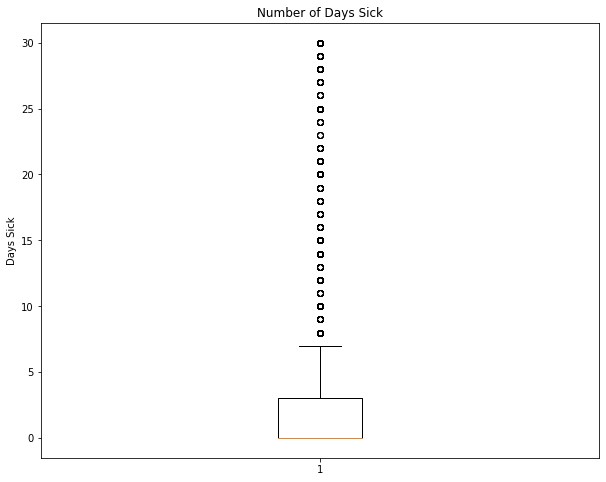

In [715]:
# A boxplot will display the above listed summary statistics.
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Number of Days Sick')
ax.set_ylabel('Days Sick')
ax.boxplot(df.PHYSHLTH.values)
plt.show()

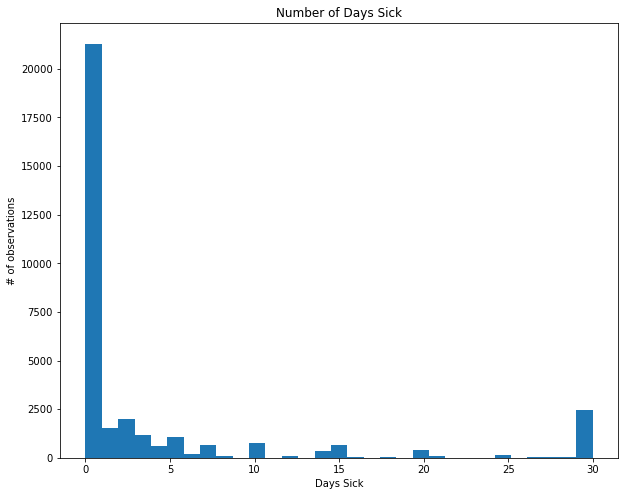

In [716]:
# A histogram will show the frequency of each response.

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Number of Days Sick')
ax.set_xlabel('Days Sick')
ax.set_ylabel('# of observations')
ax.hist(df.PHYSHLTH.values, bins=31)
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [717]:
# code to calculate the average number of sick days by state
df.groupby(['_STATE']).PHYSHLTH.mean().sort_values()

_STATE
9.0     3.688562
36.0    4.148030
34.0    4.380957
Name: PHYSHLTH, dtype: float64

In [718]:
y = df.groupby(['_STATE']).PHYSHLTH.mean().sort_values().values
x = ['CT', 'NY', 'NJ']

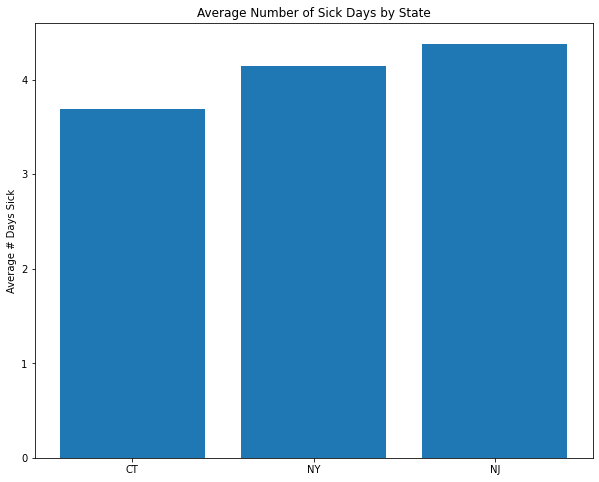

In [719]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Average Number of Sick Days by State')
ax.set_ylabel('Average # Days Sick')
ax.bar(x, y)
plt.show()

In [720]:
ct = df[df['_STATE']==9.0].PHYSHLTH.values
ny = df[df['_STATE']==36.0].PHYSHLTH.values
nj = df[df['_STATE']==34.0].PHYSHLTH.values

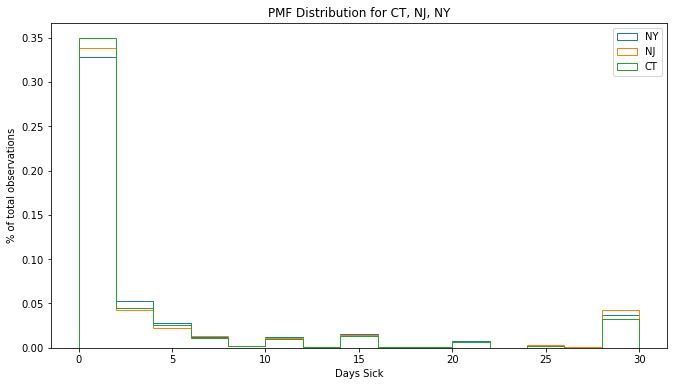

In [721]:
# graphic showing the histogram of data

n_bins=15

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(ny, n_bins, density=True, fill=False, label = 'NY', histtype='step')
ax.hist(nj, n_bins, density=True, fill=False, label = 'NJ', histtype='step')
ax.hist(ct, n_bins, density=True, fill=False, label = 'CT', histtype='step')
ax.set_title('PMF Distribution for CT, NJ, NY')
ax.set_ylabel('% of total observations')
ax.set_xlabel('Days Sick')
ax.legend(loc='upper right')

fig.tight_layout(pad=3.0)
plt.show()


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [722]:
# We define chronically sick as those persons who indicated that they were sick 15 or more days in the past 30 
# days. 
df['chron'] = np.where(df['PHYSHLTH']>=15, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [723]:
# code to calculate averages per state
df.groupby(['_STATE']).chron.mean().sort_values()

_STATE
9.0     0.103428
36.0    0.115948
34.0    0.127335
Name: chron, dtype: float64

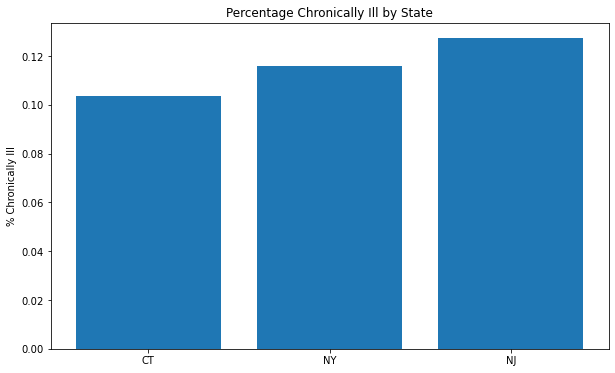

In [724]:
# create graphic to compare chronically sick by state
a = df.groupby(['_STATE']).chron.mean().sort_values().values
b = ['CT', 'NY', 'NJ']

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Percentage Chronically Ill by State')
ax.set_ylabel('% Chronically Ill')
ax.bar(b, a)

plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [725]:
conditions = [
    df['SMOKE100']==1,
    df['SMOKE100']==2,
    df['SMOKE100']==7,
    df['SMOKE100']==9
]

choices = [
    df['SMOKDAY2'],
    3,
    7,
    9
]
df['smokers'] = np.select(conditions, choices, default = np.nan)
print(df['smokers'].value_counts().sum())
df['smokers'].value_counts()

32359


3.0    28179
1.0     2611
2.0     1336
7.0      167
9.0       66
Name: smokers, dtype: int64

In [726]:
df.smokers.isna().sum()

1388

In [727]:
y_values = (df.smokers.value_counts().values)/len(df.smokers)
x_values = ["Non-Smoker", "Everday", "Some Days", "Don't Know", "Refused"]

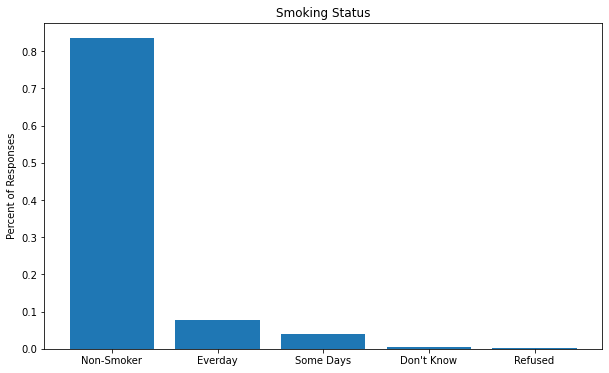

In [728]:
# code to graph those proportion of different smoking groups using matplotlib
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Smoking Status')
ax.set_ylabel('Percent of Responses')
ax.bar(x_values, y_values)
plt.show()

In [729]:
# Calculating the percentage of smokers in each state. For this graphic, let's remove those who refused to respond.
df.smokers.replace(9, 7, inplace=True)
df.smokers.value_counts()

3.0    28179
1.0     2611
2.0     1336
7.0      233
Name: smokers, dtype: int64

In [730]:
# Let's create an additional columnm to tally the number of smokers in each group (1, 2, 3, or 7)

df_smoke['responded_to_question'] = np.where(df_smoke.smokers.notna(), 1, 0)
df_smoke.responded_to_question.value_counts()

1    32293
0     1388
Name: responded_to_question, dtype: int64

In [731]:
# Let's now create a grouped df displaying the number of people from each state that responded to SMOKDAY2 in a
# particular way.
grouped_df = df_smoke.groupby(['_STATE', 'smokers']).responded_to_question.sum()
grouped_df

_STATE  smokers
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
Name: responded_to_question, dtype: int64

In [732]:
# Calculate the total number of 'smokers' in each state

ct_sum = grouped_df.iloc[0:4].sum()
nj_sum = grouped_df.iloc[4:8].sum()
ny_sum = grouped_df.iloc[8:].sum()

In [733]:
# Calculate the percentage of smokers in each group by state.

ct_values = (grouped_df.iloc[0:4]/ct_sum)*100
nj_values = (grouped_df.iloc[4:8]/nj_sum)*100
ny_values = (grouped_df.iloc[8:]/ny_sum)*100

In [734]:
# Transpose this list to create four datasets for stacking

smoking_every = np.array([ct_values.iloc[0], nj_values.iloc[0], ny_values.iloc[0]])
non_smoker = np.array([ct_values.iloc[2], nj_values.iloc[2], ny_values.iloc[2]])
some_days = np.array([ct_values.iloc[1], nj_values.iloc[1], ny_values.iloc[1]])
unknown = np.array([ct_values.iloc[3], nj_values.iloc[3], ny_values.iloc[3]])

In [735]:
import matplotlib.patches as mpatches

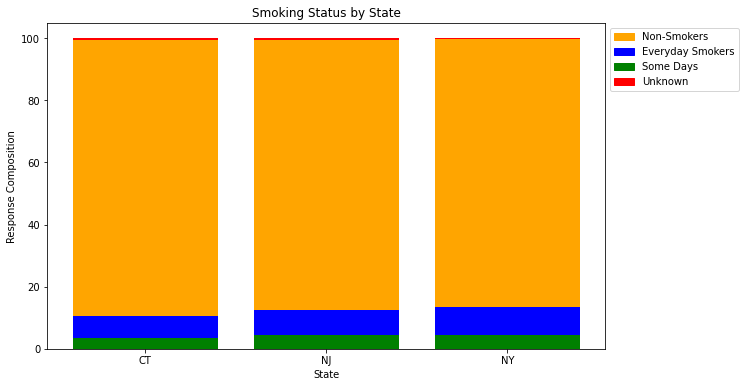

In [766]:
# Make the stacked bar chart.
states = ['CT', 'NJ', 'NY']

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Smoking Status by State')
ax.set_ylabel('Response Composition')
ax.set_xlabel('State')

ax.bar(states,non_smoker.round(2), color='orange',bottom = smoking_every.round(2) + some_days.round(2))
ax.bar(states,smoking_every.round(2), color='blue', bottom = some_days.round(2))
ax.bar(states,some_days.round(2), color='green')
ax.bar(states,unknown.round(2), color='red', bottom = non_smoker.round(2) + smoking_every.round(2) + some_days.round(2))

# Creating legend titles
non_smokers_patch = mpatches.Patch(color='orange', label='Non-Smokers')
everyday_smokers_patch = mpatches.Patch(color='blue', label='Everyday Smokers')
some_days_patch = mpatches.Patch(color='green', label='Some Days')
unknown_patch = mpatches.Patch(color='red', label='Unknown')

ax.legend(handles = [non_smokers_patch,
                     everyday_smokers_patch,
                     some_days_patch,
                     unknown_patch], 
          bbox_to_anchor=(1.0, .8, 0.3, 0.2), loc='upper left')
plt.show()

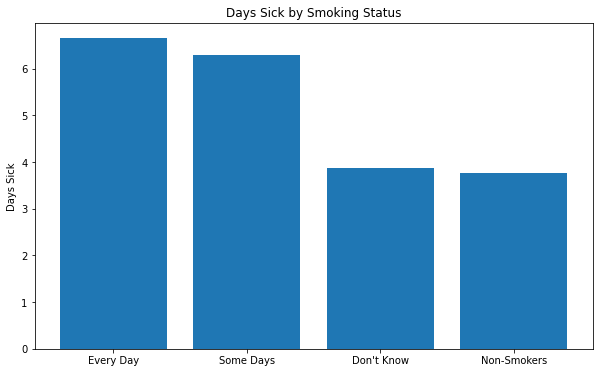

In [738]:
# Code to graph these averages sick days for each category of smoking status
smoke_hlth = df_smoke.groupby(['smokers']).PHYSHLTH.mean().sort_values(ascending=False)
status = ['Every Day', 'Some Days', "Don't Know", "Non-Smokers"]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Days Sick by Smoking Status')
ax.set_ylabel('Days Sick')
ax.bar(status, smoke_hlth)
plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [755]:
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df.ALCDAY5.replace(alc_dict)
df['alcohol'].value_counts()

0.0      12631
201.0     2968
202.0     2300
101.0     1565
203.0     1323
102.0     1217
230.0     1148
205.0     1147
204.0     1132
210.0      834
103.0      773
107.0      697
220.0      641
215.0      585
206.0      385
104.0      380
208.0      363
105.0      346
207.0      276
225.0      263
212.0      142
106.0      109
228.0       56
214.0       51
229.0       31
209.0       26
227.0       24
218.0       18
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: alcohol, dtype: int64

In [756]:
# Convert drink in past week to drinks over past month by multiplying by 4.345

conditions = [
    df.alcohol==0,
    ((df.alcohol>100)&(df.alcohol<108)),
    ((df.alcohol>200)&(df.alcohol<250)),
]

choices = [
    0,
    (df.alcohol-100)*4.345,
    df.alcohol-200
]

df.alcohol = np.select(conditions, choices, default = np.nan)

In [757]:
df.alcohol.value_counts()

0.000     12631
1.000      2968
2.000      2300
4.345      1565
3.000      1323
8.690      1217
30.000     1148
5.000      1147
4.000      1132
10.000      834
13.035      773
30.415      697
20.000      641
15.000      585
6.000       385
17.380      380
8.000       363
21.725      346
7.000       276
25.000      263
12.000      142
26.070      109
28.000       56
14.000       51
29.000       31
9.000        26
27.000       24
18.000       18
16.000       15
26.000       15
24.000       14
22.000       13
21.000       13
13.000       11
11.000       10
17.000        7
23.000        2
19.000        1
Name: alcohol, dtype: int64

In [758]:
df.alcohol.describe()

count    31532.000000
mean         5.504340
std          8.449821
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.415000
Name: alcohol, dtype: float64

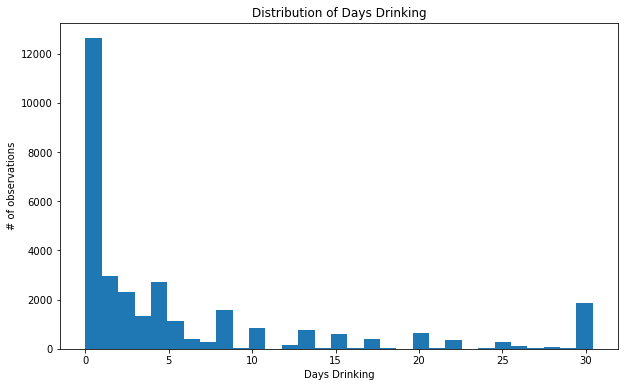

In [760]:
# graphic showing the histogram of data
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Distribution of Days Drinking')
ax.set_ylabel('# of observations')
ax.set_xlabel('Days Drinking')

ax.hist(df.alcohol, bins=31)

plt.show()

In [761]:
# code to calculate averages per state
df.groupby(['_STATE']).alcohol.mean()

_STATE
9.0     6.208444
34.0    5.067982
36.0    5.309501
Name: alcohol, dtype: float64

In [764]:
# Code to calculate correlation of between number of drinks and number of days physically ill
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']


PHYSHLTH    1.000000
alcohol    -0.091016
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


In [777]:
from scipy import stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

- Create a 95% confidence interval for the population mean of physically ill days.

In [776]:
# t-interval since we're working with a continuous variable

confidence_level = 0.95
degrees_freedom = len(df.PHYSHLTH) - 1
sample_mean = np.mean(df.PHYSHLTH)
sample_standard_error = stats.sem(df.PHYSHLTH)

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(confidence_interval)


(3.9945079218863824, 4.176173916499252)


-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [784]:
# z-interval since working with population proportions

count = df.chron.sum()
nobs = len(df.PHYSHLTH)

proportion_ci = sm.stats.proportion_confint(count, nobs, alpha=0.05, method='binom_test')
print(proportion_ci)

(0.11256969743575017, 0.11941479863310998)


## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


Null hypothesis is True with t-value = 1.84 , critical t-value = 1.6448987822656875 and p-value = 0.066


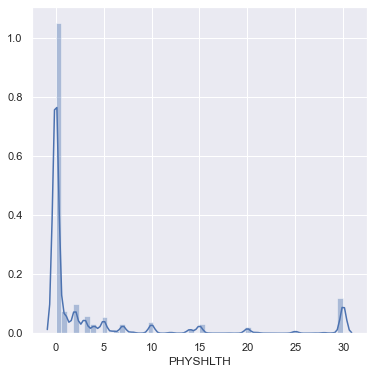

In [832]:
# Hypothesis 1
# H0: x_bar = m
# H1: x_bar != m
# Using a one-sample, 2-tailed t-test since we do not have the population standard deviation
# Or is this actually zero, because it is statistically improbable to get a mean that is exactly equal to the any
# given value. 

def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(6,6)})
    sns.distplot(sample)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar= sample.mean()

    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 3))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 3))

one_sample_ttest(df.PHYSHLTH, 4, 0.05)

In [792]:
print(df[df['SEX']==1]['PHYSHLTH'].value_counts().sum())
print(df[df['SEX']==2]['PHYSHLTH'].value_counts().sum())

14818
18911


In [830]:
# Hypothesis 2
# H0: x_men = x_fem
# H1: x_men != x_fem
# Two-sample, 2-tailed t-test to compare the mean number of days sick between men and women. Not pooling variance since
# we're unsure if the variance is the same for both groups.

# Define the samples
a = df[df['SEX']==1]['PHYSHLTH']
b = df[df['SEX']==2]['PHYSHLTH']

# df of both samples
deg_free_m = len(df[df['SEX']==1]['PHYSHLTH'])-1
deg_free_f = len(df[df['SEX']==2]['PHYSHLTH'])-1

# Calculate the critical t-value
t_crit = stats.t.ppf(1 - alpha, df=[deg_free_m if deg_free_m>deg_free_f else deg_free_f])

t, p = stats.ttest_ind(a, b, equal_var=False)
print("ttest_ind:          t_crit = %g  t = %g  p = %g" % (t_crit, t, p))

# Given the p-value of practically 0, we can reject the null hypothesis and conclude that the difference in average
# days sick is statistically diffferent between men and women in the sample.



ttest_ind:          t_crit = 1.64493  t = -7.38441  p = 1.56787e-13


In [799]:
# Hypothesis 3
# H0: x1 = x2 = x3
# H1: x1 != x2 != x3
# Oneway ANOVA test since measuring the difference in means (continuous) across states in the sample.

ct = df[df['_STATE']==9]['PHYSHLTH']
nj = df[df['_STATE']==34]['PHYSHLTH']
ny = df[df['_STATE']==36]['PHYSHLTH']

F, p = stats.f_oneway(ct, nj, ny)
print("ttest_ind:         F = %g  p = %g" % (F, p))

# Given such a small p-value, we can reject the null hypothesis and conclude that the average number of days sick
# in each state is statistically different. 


ttest_ind:         F = 18.5586  p = 8.80061e-09


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?

In [811]:
# H0: x = m
# H1: x != m
# Z-test since working with population proportions

counts = df.chron.sum()
nobs = len(df.PHYSHLTH)
z_crit = stats.norm.ppf(1-.05/2)

z, p = sm.stats.proportions_ztest(counts, nobs, alternative='two-sided', value=.1)
print("ttest_ind:      z_crit = %g  Z = %g  p = %g" % (z_crit, z, p))

# Given the small p-value, we reject the null hypothesis that the sample proportion is equal to the population
# proportion of 10%.

ttest_ind:      z_crit = 1.95996  Z = 9.15232  p = 5.57226e-20


- Is there a statistically significant difference in the percentage of men and women who are chronically sick?

In [821]:
# H0: x_m = m_f
# H1: x_m != x_f
# Chi-square test since dependent and independent variables are both categorical

from scipy.stats import chi2_contingency
from scipy.stats import chi2

m_chron = df[df['SEX']==1]['chron'].sum()
f_chron = df[df['SEX']==2]['chron'].sum()
m_not = len(df[(df['SEX']==1)&(df['chron']==0)]['chron'])
f_not = len(df[(df['SEX']==2)&(df['chron']==0)]['chron'])

table = [[m_chron, m_not], [f_chron, f_not]]

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % (dof))
print(expected)

dof=1
[[ 1717.76157016 13100.23842984]
 [ 2192.23842984 16718.76157016]]


In [822]:
prob = 0.95
critical = chi2.ppf(prob, dof)

In [823]:
# Interpret the test-statistic & p-value
print('probability = %.3f,    critical=%.3f,    stat=%.3f' % (prob, critical, stat))
if abs(stat)>= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability = 0.950,    critical=3.841,    stat=33.648
Dependent (reject H0)


In [ ]:
# The rejection of the null hypothesis would indicate that there is a significant
# difference in prevalence of chronic illness between men and women.

- Perform a statistical test to determine if there is a statistically significant difference in chronic illness among people from the three states.

In [827]:
# Chi-square test of independence
# H0: p1 = p2 = p3
# H1: p1 != p2 != p3

ct_chron = df[df['_STATE']==9]['chron'].sum()
nj_chron = df[df['_STATE']==34]['chron'].sum()
ny_chron = df[df['_STATE']==36]['chron'].sum()
ct_not = len(df[(df['_STATE']==9)&(df['chron']==0)]['chron'])
nj_not = len(df[(df['_STATE']==34)&(df['chron']==0)]['chron'])
ny_not = len(df[(df['_STATE']==36)&(df['chron']==0)]['chron'])

table = [[ct_chron, nj_chron, ny_chron], [ct_not, nj_not, ny_not]]

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % (dof))
print(expected)

dof=2
[[ 1207.39825762  1328.56710226  1377.03464012]
 [ 9205.60174238 10129.43289774 10498.96535988]]


In [828]:
prob = 0.95
critical = chi2.ppf(prob, dof)

In [829]:
# Interpret the test-statistic & p-value
print('probability = %.3f,    critical=%.3f,    stat=%.3f' % (prob, critical, stat))
if abs(stat)>= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability = 0.950,    critical=5.991,    stat=30.415
Dependent (reject H0)


# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.